# Accounting For Ripples

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


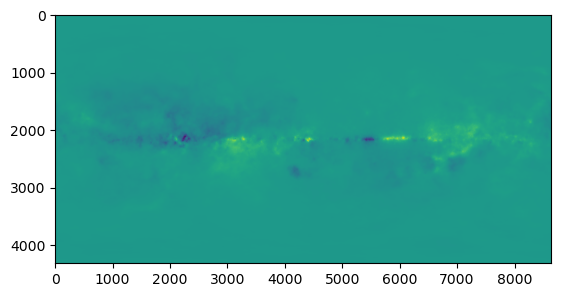

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator
from plotting import honours_plot as hplt
import matplotlib.pyplot as plt

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

plt.imshow(collated_data['interpolation']['interpolation'].data)

In [2]:
from foreground import interpolate as intp
import numpy as np

k_space = collated_data['interpolation']['k-space']
interpolation_0 = collated_data['interpolation']['interpolation']
interpolation_100 = collated_data['interpolation']['corrected']

interpolation_20 = intp.fourier_interpolate(interpolation_0, k_space, (1, np.pi), scale=0.8)
interpolation_40 = intp.fourier_interpolate(interpolation_0, k_space, (1, np.pi), scale=0.6)
interpolation_60 = intp.fourier_interpolate(interpolation_0, k_space, (1, np.pi), scale=0.4)
interpolation_80 = intp.fourier_interpolate(interpolation_0, k_space, (1, np.pi), scale=0.2)

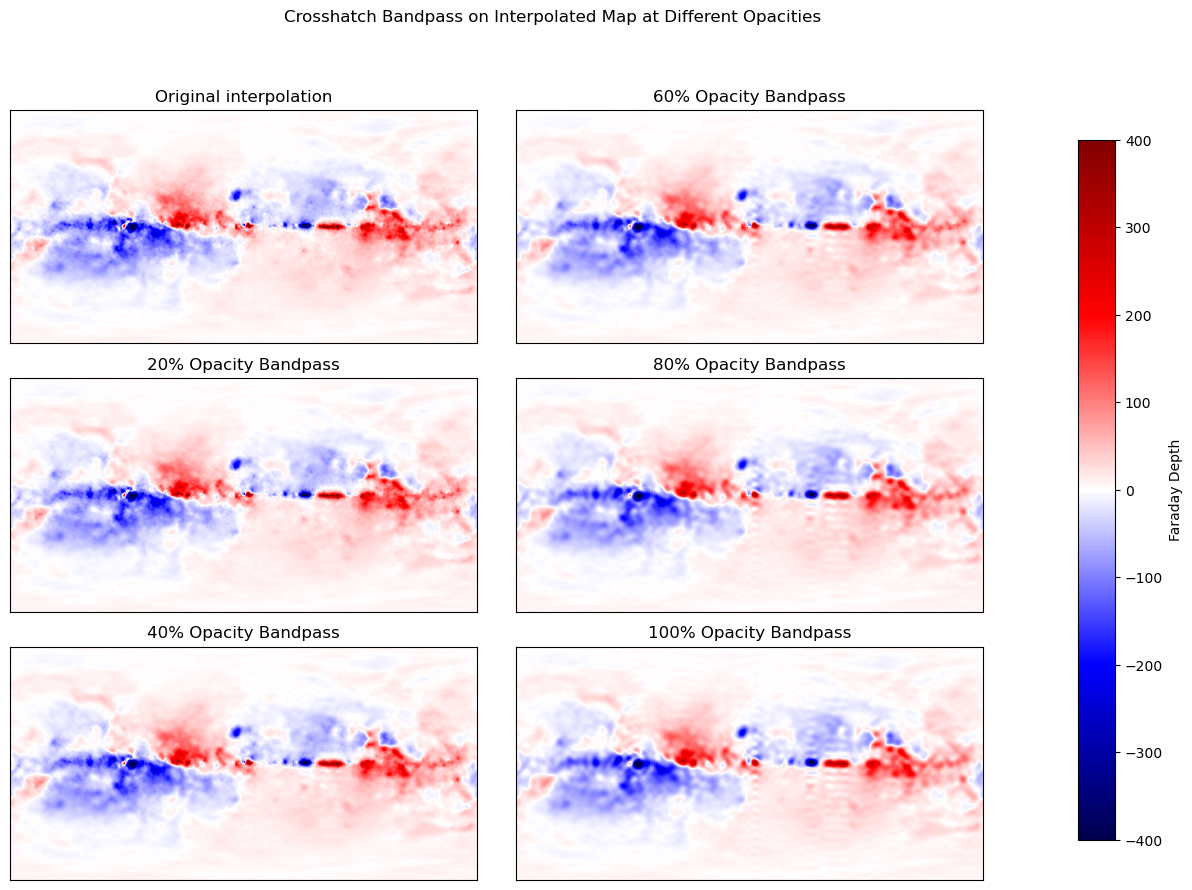

In [3]:
colormap = plt.colormaps["seismic"]

fig = plt.figure(figsize=(15, 10))
plt.tight_layout()

plt.suptitle("Crosshatch Bandpass on Interpolated Map at Different Opacities")

# 1st Row

plt.subplot(3, 2, 1)
plt.title("Original interpolation")
plt.imshow(interpolation_0.data, cmap=colormap, origin='lower')
plt.xticks([])
plt.yticks([])
plt.clim(-400,400)

plt.subplot(3, 2, 2)
plt.title(r"60% Opacity Bandpass")
plt.imshow(interpolation_60.data, cmap=colormap, origin='lower')
plt.xticks([])
plt.yticks([])
plt.clim(-400,400)

# 2nd Row

plt.subplot(3, 2, 3)
plt.title(r"20% Opacity Bandpass")
plt.imshow(interpolation_20.data, cmap=colormap, origin='lower')
plt.xticks([])
plt.yticks([])
plt.clim(-400,400)

plt.subplot(3, 2, 4)
plt.title(r"80% Opacity Bandpass")
plt.imshow(interpolation_80.data, cmap=colormap, origin='lower')
plt.xticks([])
plt.yticks([])
plt.clim(-400,400)

# 3rd Row

plt.subplot(3, 2, 5)
plt.title(r"40% Opacity Bandpass")
plt.imshow(interpolation_40.data, cmap=colormap, origin='lower')
plt.xticks([])
plt.yticks([])
plt.clim(-400,400)

plt.subplot(3, 2, 6)
plt.title(r"100% Opacity Bandpass")
image = plt.imshow(interpolation_100.data, cmap=colormap, origin='lower')
plt.xticks([])
plt.yticks([])
plt.clim(-400,400)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
fig.colorbar(image, cax=cbar_ax, label=r"Faraday Depth")
plt.subplots_adjust(wspace=0, hspace=0.15)

plt.show()